# Summa control notebook

In [1]:
# netcdf/numpy/xray/stats
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import xarray as xr
from scipy.stats.stats import pearsonr

# OS interaction
import sys, pickle, os

# import plotting
import seaborn as sns
import matplotlib
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap

import summapy

# Customize
sns.set_style("whitegrid")
sns.set_context('paper')
%matplotlib inline

In [2]:
# --------------------------------------------------------------------------------------------------------------------
# Directory Lists
# Unix
if 'linux' in sys.platform:
    dir_pre = '/home/lapok/gdrive/'
# Mac
elif 'darwin' in sys.platform:
    dir_pre = '/Users/karllapo/gdrive/'

# Project specific directories
dirProj = dir_pre + 'SnowHydrology/proj/ModTsfc/'
dirPrint = dirProj + 'Graphics'
dirData = dirProj + 'data'

# Summa specific directories/names
dirSumma = dirProj + 'summa/'
projName = 'summaTestCases'

In [3]:
# Arguments that will eventually be passed to a master function
os.chdir(dirData)
dat = xr.open_dataset('SWA.ModTsfc.ModelForcing_wy2009.nc')
attr = xr.open_dataset('SWA.ModTsfc.Attributes.nc')
siteName = 'SWA'
myDecisions = {'astability': 'louisinv',
               'subRouting': 'qInstant'}
dirModel = '/Users/karllapo/gdrive/SnowHydrology/proj/ModTsfc/summa/ModTsfc_summa/'

# Layer Experiments

In [4]:
# Set up modeling decisions. Non-specified decision will follow the default values set by summa and summapy
expName = 'layers'
arrayExpID = ['jrdn1991', 'CLM_2010', 'layerThin', 'layerThick']
myDecisions = {'astability': 'louisinv',
               'subRouting': 'qInstant',
               'alb_method': 'conDecay'}

allParams = {'albedoMinWinter': 0.4,
             'albedoMinSpring': 0.4}

layerThin = {'zminLayer3': 100.0000,
             'zminLayer4': 100.0000,
             'zminLayer5': 100.0000,
             'zmaxLayer2_lower': 1000.0000,
             'zmaxLayer3_lower': 1000.0000,
             'zmaxLayer4_lower': 1000.0000,
             'zmaxLayer2_upper': 1000.0000,
             'zmaxLayer3_upper': 1000.0000,
             'zmaxLayer4_upper': 1000.0000}
layerThin.update(allParams)

layerThick = {'zminLayer1': 0.0500,
              'zminLayer2': 0.0200,
              'zminLayer3': 100.0000,
              'zminLayer4': 100.0000,
              'zminLayer5': 100.0000,
              'zmaxLayer1_lower': 0.2000,
              'zmaxLayer2_lower': 1000.0000,
              'zmaxLayer3_lower': 1000.0000,
              'zmaxLayer4_lower': 1000.0000,
              'zmaxLayer1_upper': 0.1500,
              'zmaxLayer2_upper': 1000.0000,
              'zmaxLayer3_upper': 1000.0000,
              'zmaxLayer4_upper': 1000.0000}
layerThick.update(allParams)


In [5]:
# Consistent files across all experiments
summapy.summaFileManager.writeDefault(dirModel, siteName, expName)
summapy.summaFileManager.localAttributesFile(attr, dirModel, siteName, expName)

# Experiment specific files
for expID in arrayExpID:
    print(expID)
    # Parameterize for 2-layer thin, 2-layer thick, jordan, and clm
    if expID == 'layerThin':
        myDecisions['snowLayers'] = 'CLM_2010'
        strParam = list(layerThin.keys())
        valParam = list(layerThin.values())
        summapy.summaFileManager.paramTrial(strParam, valParam, dirModel, siteName, expName, expID)
    elif expID == 'layerThick':
        myDecisions['snowLayers'] = 'CLM_2010'
        strParam = list(layerThick.keys())
        valParam = list(layerThick.values())
        summapy.summaFileManager.paramTrial(strParam, valParam, dirModel, siteName, expName, expID)
    else:
        myDecisions['snowLayers'] = expID
        summapy.summaFileManager.paramTrial(list(allParams.keys()), list(allParams.values()),
                                            dirModel, siteName, expName, expID)

    summapy.summaFileManager.forcingFile(dirModel, siteName, expName,
                                         'SWA.ModTsfc.ModelForcing_wy2009.nc',
                                         np.array(1001), xrForce=dat, expID=expID)    
    summapy.summaFileManager.decision(myDecisions, dirModel, siteName, expName,
                                      pd.to_datetime(dat.time[0].values),
                                      pd.to_datetime(dat.time[-1].values), expID=expID)
    summapy.summaFileManager.fileManager(dirModel, '/ModTsfc_summa/', siteName, expName, expID=expID)

jrdn1991
0.4    0.4
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
CLM_2010
0.4    0.4
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
layerThin
100.0    100.0    1000.0    100.0    1000.0    0.4    0.4    1000.0    1000.0    1000.0    1000.0
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
layerThick
100.0    100.0    0.4    1000.0    1000.0    100.0    0.05    1000.0    1000.0    0.15    0.02    0.4    1000.0    1000.0    0.2
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager


# Thermal Conductivity Tests

In [6]:
# Set up modeling decisions. Non-specified decision will follow the default values set by summa and summapy
expName = 'thermalCond'
arrayExpID = ['tyen1965', 'melr1977', 'jrdn1991', 'smnv2000']

thermalCondVar = [0.3500, 0.1000, 1.0000]
thermalCondName = ['fixedThermalCond_snow']
expIDAppend = ['Mid', 'Low', 'High']

myDecisions = {'astability': 'louisinv',
               'subRouting': 'qInstant'}

In [7]:
# Consistent files across all experiments
summapy.summaFileManager.writeDefault(dirModel, siteName, expName)
summapy.summaFileManager.localAttributesFile(attr, dirModel, siteName, expName)

# Experiment specific files
for expID in arrayExpID:
    for val, append in zip(thermalCondVar, expIDAppend):
        myDecisions['thCondSnow'] = expID
        print(expID + append)
        summapy.summaFileManager.paramTrial(thermalCondName, val, dirModel, siteName, expName, expID + append)
        summapy.summaFileManager.forcingFile(dirModel, siteName, expName,
                                             'CDP.ModTsfc.ModelForcing_wy2006.nc',
                                             np.array(1001), xrForce=dat, expID=expID + append)    
        summapy.summaFileManager.decision(myDecisions, dirModel, siteName, expName,
                                          pd.to_datetime(dat.time[0].values),
                                          pd.to_datetime(dat.time[-1].values), expID=expID + append)
        summapy.summaFileManager.fileManager(dirModel, '/ModTsfc_summa/', siteName, expName, expID=expID + append)

tyen1965Mid
0.35
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
tyen1965Low
0.1
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
tyen1965High
1.0
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
melr1977Mid
0.35
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
melr1977Low
0.1
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
melr1977High
1.0
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
jrdn1991Mid
0.35
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
jrdn1991Low
0.1
Finished creating new summa_zParamTrial file
Finished c

# Longwave bias

In [8]:
# Set up modeling decisions. Non-specified decision will follow the default values set by summa and summapy
expName = 'longwaveBias'
arrayExpID = ['lowLW', 'obsLW', 'highLW']
biasMod = {'lowLW': -20,
           'obsLW': 0,
           'highLW': 20}

myDecisions = {'astability': 'louisinv',
               'subRouting': 'qInstant'}

In [9]:
# Consistent files across all experiments
summapy.summaFileManager.writeDefault(dirModel, siteName, expName)
summapy.summaFileManager.localAttributesFile(attr, dirModel, siteName, expName)

# Experiment specific files
for expID in arrayExpID:
    print(expID)
    CDPtemp = xr.Dataset(dat)
    CDPtemp['LWRadAtm'] = CDPtemp['LWRadAtm'] + biasMod[expID]
    
    summapy.summaFileManager.paramTrial('', [], dirModel, siteName, expName, expID)
    summapy.summaFileManager.forcingFile(dirModel, siteName, expName,
                                         'CDP.ModTsfc.ModelForcing_wy2006.' + expID + '.nc',
                                         np.array(1001), xrForce=CDPtemp, expID=expID)
    summapy.summaFileManager.decision(myDecisions, dirModel, siteName, expName,
                                      pd.to_datetime(dat.time[0].values),
                                      pd.to_datetime(dat.time[-1].values), expID=expID)
    summapy.summaFileManager.fileManager(dirModel, '/ModTsfc_summa/', siteName, expName, expID=expID)

lowLW

Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
obsLW

Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
highLW

Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager


## Turbulence

In [10]:
# Set up modeling decisions. Non-specified decision will follow the default values set by summa and summapy
expName = 'stability'
arrayExpID = ['standard', 'louisinv', 'mahrtexp']

aerodynamic_z0 = [.001, .01, .1]
varName = ['z0Snow']
expIDAppend = ['Low', 'Mid', 'High']

myDecisions = {'astability': 'louisinv',
               'subRouting': 'qInstant'}

In [11]:
# Consistent files across all experiments
summapy.summaFileManager.writeDefault(dirModel, siteName, expName)
summapy.summaFileManager.localAttributesFile(attr, dirModel, siteName, expName)

# Experiment specific files
for expID in arrayExpID:
    for val, append in zip(aerodynamic_z0, expIDAppend):
        print(expID + append)
        myDecisions['astability'] = expID
        summapy.summaFileManager.paramTrial(varName, val, dirModel, siteName, expName, expID + append)
        summapy.summaFileManager.forcingFile(dirModel, siteName, expName,
                                             'CDP.ModTsfc.ModelForcing_wy2006.nc',
                                             np.array(1001), xrForce=dat, expID=expID + append)    
        summapy.summaFileManager.decision(myDecisions, dirModel, siteName, expName,
                                          pd.to_datetime(dat.time[0].values),
                                          pd.to_datetime(dat.time[-1].values), expID=expID + append)
        summapy.summaFileManager.fileManager(dirModel, '/ModTsfc_summa/', siteName, expName, expID=expID + append)

standardLow
0.001
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
standardMid
0.01
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
standardHigh
0.1
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
louisinvLow
0.001
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
louisinvMid
0.01
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
louisinvHigh
0.1
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
mahrtexpLow
0.001
Finished creating new summa_zParamTrial file
Finished creating new Decision file
Finished creating new file Manager
mahrtexpMid
0.01
Finished creating new summa_zParamTrial file
Fini

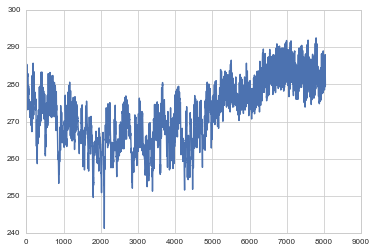

In [12]:
plt.plot(dat.airtemp)